# A/B Case Study

A software company has launched a brand new software with the following setup - users can download and use the software for one week from the day of download absolutely free. After the end of the free trial, however, they are required to pay for a license to continue using the software. The company is trying to encourage more people to purchase their product. To achieve that the company wants to try out some changes in the present layout of the homepage - they want to emphasize more on the one week free trial option. The hope is that this will encourage more people to download and use the software initially for free and when they find the usability of the product they might consider to buy it.

In this notebook, we will perform an experiment to test whether the company should deploy this change or not. The goal of the experiment can be stated as follows :

*Modifying the structure of the homepage will encourage more people to download the software and then finally buy it.*

##  Constructing a user funnel

The first step to conduct an experiment is to build the user funnel. A **user funnel** is the series of steps that you expect a user to take when that user is on your website. The website has the following five main sections :

1. a homepage
2. a section with additional informations
3. a download page for the software
4. a page for users to purchase the license for the software
5. a support page for documantation and FAQs related to the software

The website requires the users to create an account at the time of downloading the software. When the free trial period ends, a dialogue box will appear on the user's screen taking them to the license page. Each user buying the software will receive a unique usedId associated with their accounts on the website. A user when on the company website is expected to follow the below steps :

1. visit the homepage
2. visit the download page
3. sign up for the account
4. download the software
5. after the free trial period, the software takes the user to the license page
6. purchase the software

The above steps form a user funnel. There will be dropoffs in the users who move from one step to the next step in the funnel with only a few making it to the end. That means the probability decreases as you go down in the user funnel. Also, the above user funnel is not a unique set of paths/steps taken by every user visiting that page, *e.g.*, a user might take some additional steps between any two consecutive steps shown above.

## Deciding on metrics

The next step is to choose metric(s) to measure the changes that we wish to see. The metrics should be aligned with our desired effect. Since we want to measure the changes due to the modifications introduced in the website, the experiment should be performed on the following two groups :

- **Control group** : users in this group see the old homepage
- **Experiment group** : users in this group see the new homepage

Comparing the behavior of the users in the above two groups, we can measure the effect of the manipulations.

The choice of metric(s) will depend on where and how we divide our users into control and experiment groups inside the funnel. Since our primary goal is to bring more and more users to the download page, *the point of diversion in this case should be the homepage, i.e., the very first step in the user funnel.* 

A *cookie-based diversion* seems to be a right choice in this case where we assign a cookie to every visitor to the website upon their first visit. This cookie then can be used to keep track of each visitor on each page of the website, whether they download the software and so on. 

The metrics can be categorized in the following way :

- **Invariant metric** : This metric ensures that the two groups on which we are conducting the experiment are equivalent. In other words, all the other features of these two groups should be comparable except the one that we are manipulating (*e.g.*, in this case the layout of the homepage). This will ensure that the observed difference in the behavior between the two groups are only due to the changes that we introduced. Since our unit of diversion here is the homepage, the ideal invariant metric would be number of cookies (*i.e.* users) hitting the homepage. We need this metric to be equivalent for both the groups to actually perform the experiment.

- **Evaluation metric** : These metrics will be used to evaluate the performance of the experiment. We choose the following metrics as our evaluation metrics in this case : 
\begin{equation*}
download \: rate \: (DR) = \frac{number \: of \: downloads}{number \: of \: cookies} \\
purchase \: rate \: (PR) = \frac{number \: of \: purchases}{number \: of \: cookies}
\end{equation*}

Note that, it is always a good idea to use ratios as metrics instead of absolute number, *e.g.*, total number of visitors on the download or license page. Although we assume the number of cookies assigned to each group to be same, in reality there would be slight imbalance between the two groups. All we want is that this imbalance should not be statistically significant.

## Computing the size of the experiment

Before starting the experiment, we should check whether it is at all feasible or not. That means, the amount of time required to see the desired effect from the results of the experiment must be practical. From the past data, we have the following informations:

1. there are about 3250 unique visitors per day
2. there are about 520 software downloads per day (at a rate 0.16)
3. there are about 65 licenses purchased per day (at a rate 0.02)

The ideal situation is when both the evaluation metrics show a statistically significant increment due to the new homepage. But the company decided to deploy the new layout even if any one of the metrics shows a statistically significant positive effect. We now ask the following questions:

**Let's say we want to detect an increase of 50 downloads per day, i.e., a download rate of 0.175. What is the minimum runtime of the experiment to collect sufficient amount of data to detect a 1.5% increase in the download rate due to the new layout at an overall 5% type I error rate ($\alpha$) and 80% power? **

The sample size is given by 
\begin{equation*}
n = \big[\big(\frac{Z_{1-\alpha}S_{0}-Z_{\beta}S_{1}}{P_1 - P_0}\big)\big]
\end{equation*}

where  <br/>

$P_1 - P_0$ : size of the effect due to manipulation *i.e.*, increment in the download rate <br/>
$S_0$ : standard deviation of the control group  <br/>
$S_1$ : standard deviation of the experiment group  <br/>
$Z_{1-\alpha}$ : z-score of the control group at $1-\alpha$ <br/>
$Z_{\beta}$ : z-score of the experiment group at $\beta$ <br/>

With the provided informations, one can compute the following : <br/>

$P_1 - P_0$ = 0.175 - 0.16 = 0.015 <br/>

$\alpha \equiv$ type I error rate = 0.025 (since overall type I error rate should be 5%, applying Bonferroni correction to the type I error for each of the metrics gives a value of 0.025) <br/>

$\beta$ = 1 - power = 1 - 0.8 = 0.2 <br/>

$S_0 = \sqrt{ \left( P_0 (1 - P_0) \right) +  \left( P_0 (1 - P_0) \right)}$ <br/>

$S_1 = \sqrt{ \left( P_0 (1 - P_0) \right) +  \left( P_1 (1 - P_1) \right)}$ <br/>

Using all the values above, we find that a minimum sample size $n = 9481$ is required for this effect to show up. Now as from the past data we have 3250 unique visitors per day, *i.e.*, 1625 unique visitors per group per day. Therefore to be able to collect the required amount of data, we need to run our experiment to detect a 1.5% increase in the download rate for $9481/1625 \sim 6$ days.

**Let's say we want to detect an increase of 10 license purchases per day, i.e. a purchase rate of 0.023.  What is the minimum runtime of the experiment to collect sufficient amount of data to detect a 0.3% increase in the purchase rate due to the new layout at an overall 5% type I error rate ($\alpha$) and 80% power? **

Following exactly the same steps as shown above, one finds that to detect a 0.03% increase in the purchase rate, we need to run our experiment for $34930/1625 \sim 21$ days.

So both the metrics have a short timeframe to show up a desired amount of effect in the results and hence considering both of them seems to be a reasonable proposition. However, there is a catch. The users might not return immediately after the one week free trial period to purchase the software. So we will run our experiment for about one week longer to consider the users who will come towards the last phase of the experiment and include them in tthe purchase metric if they decide to purchase the software.

## Analysis of the data 

Let's assume that the experiment was run for 29 days and data for both the control and experiment group was collected.

### Importing the libraries and data

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("homepage-experiment-data.csv")
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


Each group has three entries - number cookies, downloads, license purchases on each day of the experiment. 

### Step 1 : Hypothesis test for the invariant metric

Before performing the actual experiment, we need to make sure that the two groups under consideration are comparable. In other words, the invariant metric should be same for both the groups.

We set up the null and alternative hypotheses for the invariant metric as follows :
\begin{equation*}
H_0 : NC_{old} = NC_{new} \rightarrow NC_{old} - NC_{new} = 0 \\
H_1 : NC_{old} \neq NC_{new} \rightarrow NC_{old} - NC_{new} \neq 0
\end{equation*}

where $NC_{old} \: (NC_{new})$ denotes total number of cookies in the old (new) homepage ,*i.e.*,in the control (experiment) group. So the null hypothesis $(H_0)$ states that total number of cookies should be equal in both groups whereas the alternative hypothesis $(H_1)$ says that they should be unequal.

Lets' calculate the difference in mean values of number of cookies in the two groups.

In [5]:
avg_cookie_control = df['Control Cookies'].mean()
avg_cookie_exp = df['Experiment Cookies'].mean()

In [6]:
avg_cookie_control, avg_cookie_exp

(1615.551724137931, 1632.6206896551723)

In [7]:
avg_cookie_diff = avg_cookie_exp - avg_cookie_control
avg_cookie_diff

17.068965517241395

To test $H_0$, we bootstrap 10000 samples from the original collected data.

In [8]:
diffs = []

for _ in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    avg_cookie_control = df_sample['Control Cookies'].mean()
    avg_cookie_exp = df_sample['Experiment Cookies'].mean()
    avg_cookie_diff = avg_cookie_exp - avg_cookie_control
    diffs.append(avg_cookie_diff)

In [10]:
diffs = np.array(diffs)

The observed value of the sample mean is given by:

In [11]:
obs_mean = diffs.mean()
obs_mean

16.859955172413795

Assuming that $H_0$ is true, we can look at the sampling distribution of the difference in average number of cookies between the groups. The mean of this distribution should be at 0 (directly follows from the statement of $H_0$) and the standard deviation is same as that of the bootstrapped sample. We can then draw samples from a normal distribution with the specified mean and standard deviation.

In [12]:
null_mean = 0.
null_std = diffs.std()

In [13]:
null_sample = np.random.normal(loc=null_mean, scale=null_std, size=diffs.size)

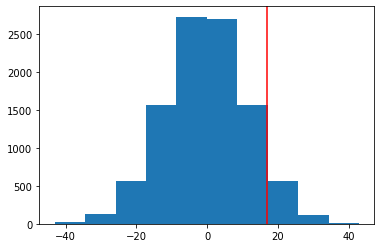

In [14]:
plt.hist(null_sample);
plt.axvline(obs_mean, color='red')

The above plot shows the sampling distribution of the difference in average number of cookies between the control and experiment groups assuming $H_0$ to be true. The red vertical line represents the observed sample mean. One can now calculate the p-value of this two-sided test in the following manner :

In [15]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)
p_val = (null_sample > upper_bound).mean() + (null_sample < lower_bound).mean()
p_val

0.14900000000000002

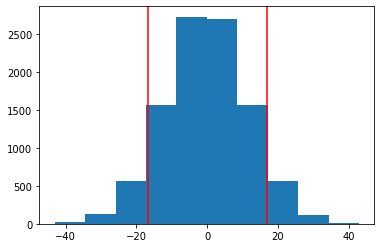

In [16]:
plt.hist(null_sample);
plt.axvline(upper_bound, color='red')
plt.axvline(lower_bound, color='red')

The p-value of the test is given by the sum of the areas below and above the lower and upper red vertical lines respectively.

Since p_val $\gt \alpha$, we fail to reject the null hypothesis. In other words, the difference in the average number of cookies between two groups is not statistically significant. Therefore, the two groups are comparable and we can proceed to evaluate the evaluation metrics.   

### Step 2 : Hypothesis test for the evaluation metric DR

We set up the null and alternative hypotheses for the evaluation metric DR as follows :

\begin{equation*}
H_0 : DR_{old} <= DR_{new} \rightarrow DR_{old} - DR_{new} <= 0 \\
H_1 : DR_{old} > DR_{new} \rightarrow DR_{old} - DR_{new} > 0
\end{equation*}

To test the above hypotheses, we follow exactly the same steps as we did for the invariant metric.

In [19]:
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


In [18]:
dr_control = df['Control Downloads'].sum()/df['Control Cookies'].sum()
dr_exp = df['Experiment Downloads'].sum()/df['Experiment Cookies'].sum()
dr_control, dr_exp

(0.16123455209067042, 0.180543234908968)

In [19]:
dr_diff = dr_exp - dr_control
dr_diff

0.01930868281829759

In [20]:
diffs = []

for _ in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    dr_control = df_sample['Control Downloads'].sum()/df_sample['Control Cookies'].sum()
    dr_exp = df_sample['Experiment Downloads'].sum()/df_sample['Experiment Cookies'].sum()
    dr_diff = dr_exp - dr_control
    diffs.append(dr_diff)

In [21]:
null_mean = 0.
null_std = np.array(diffs).std()
obs_mean = np.array(diffs).mean()

In [22]:
null_sample = np.random.normal(loc=null_mean, scale=null_std, size=len(diffs))

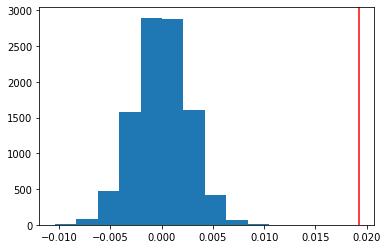

In [23]:
plt.hist(null_sample);
plt.axvline(obs_mean, color='red')

It is clear from the above plot that the p-value of the test falls well below the statistical significance bound $\alpha$ and hence we can reject the null hypothesis in favor of the alternative. In other words, the increment in the download rate due to the modifications introduced in the homepage of the website is statistically significant.

### Step 3 : Hypothesis test for the evaluation metric PR

We set up the null and alternative hypotheses for the $2^{nd}$ evaluation metric pR as follows :
\begin{equation*}
H_0 : PR_{old} <= PR_{new} \rightarrow PR_{old} - PR_{new} <= 0 \\
H_1 : PR_{old} > PR_{new} \rightarrow PR_{old} - PR_{new} > 0
\end{equation*}

Again, we follow exactly the same steps as we above.

In [24]:
lr_control = df['Control Licenses'].sum()/df['Control Cookies'].sum()
lr_experiment = df['Experiment Licenses'].sum()/df['Experiment Cookies'].sum()
lr_control, lr_experiment

(0.01515442573264178, 0.015460651374984159)

In [25]:
lr_diff = lr_experiment - lr_control
lr_diff

0.0003062256423423792

In [26]:
diffs = []

for _ in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    lr_control = df_sample['Control Licenses'].sum()/df_sample['Control Cookies'][:21].sum()
    lr_experiment = df_sample['Experiment Licenses'].sum()/df_sample['Experiment Cookies'][:21].sum()
    lr_diff = lr_experiment - lr_control
    diffs.append(lr_diff)

In [27]:
null_mean = 0.
null_std = np.array(diffs).std()
obs_mean = np.array(diffs).mean()

In [28]:
null_sample = np.random.normal(loc=null_mean, scale=null_std, size=len(diffs))

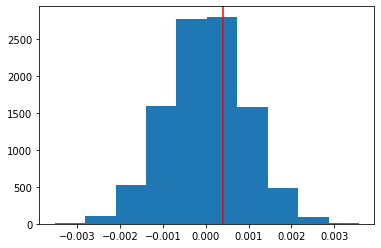

In [29]:
plt.hist(null_sample);
plt.axvline(obs_mean, color='red')

In [30]:
p_val = (null_sample > obs_mean).mean()
p_val

0.3332

The p-value of the test is given by the area above the red line and we find that p_val $> \alpha$. Therefore we fail to reject $H_0$ and reach the conclusion that the increment in the purchase rate due to the newly introduced features in the homepage is not statistically significant.

## Conclusion

From the above tests, we see that the modified homepage of the website has a strong effect on the metric download rate. The other one, *i.e.*, the purchase rate, however, does not show up any statistically significant effect. Recall that the company decided to deploy the new homepage layout even if one of the two evaluation metrics appears to be statiscally significant.

Therefore we will go ahead with our plan and deploy the modifications. One can draw the following conclusion from the experiment - the new homepage do encourage more visitors to go to the download page and eventually try out the software. But not many of them come back to purchase it as we would have wanted them to. There could be various reasons for that. The present collected data do not actually tell us much about individual user. After deploying the changes, we might want to collect more detailed data about the website visitors to understand how can we further improve the purchase rate.